In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.morphology import dilation, erosion, opening, closing, footprint_rectangle

# Imagen de distancia

## Cargue y visualice objects.png.

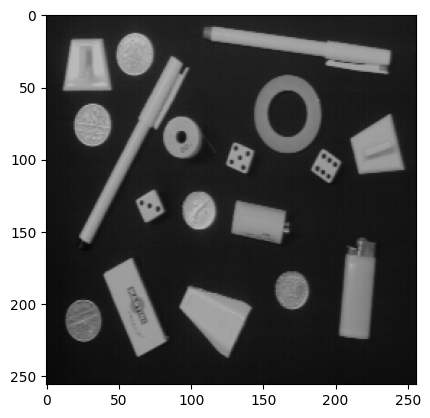

In [2]:
objects = cv2.imread('images/objects.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(objects, cmap='gray', vmin=0, vmax=255)
plt.show()

## Umbralice esta imagen para separar los objetos del fondo (umbral=70).

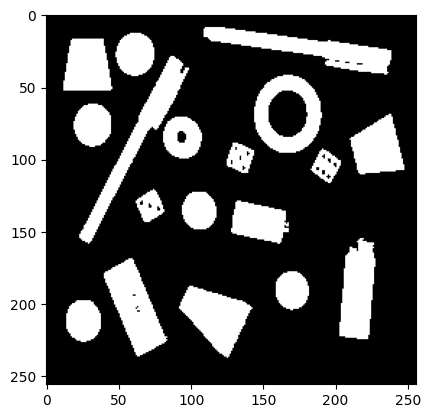

In [4]:
thres_value, thres_objects= cv2.threshold(objects, 70, 255, cv2.THRESH_BINARY)
plt.imshow(thres_objects, cmap='gray', vmin=0, vmax=255)
plt.show()

## Calcule la imagen de distancia. Puede efectuar una expansión del contraste sobre la imagen de distancia para visualizar mejor el resultado. Ajuste el Window/Level.

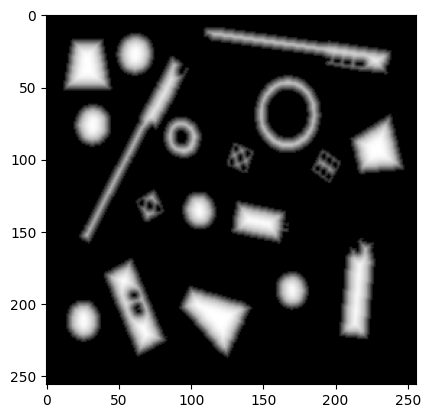

In [14]:
from scipy.ndimage import distance_transform_edt
from skimage import exposure


edm = distance_transform_edt(thres_objects)


rescaled_img = exposure.rescale_intensity(edm, out_range=(0,255)).astype(np.uint8)
rescaled_img = cv2.equalizeHist(rescaled_img)

plt.imshow(rescaled_img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Calcule ahora el negativo de la imagen umbralizada del punto 3. Ahora realice el cálculo de la distancia euclidiana. Utilizando la imagen resultante, determine la distancia mínima entre los dos lápices. Utilice máscaras y operaciones sobre pixeles para determinar el valor del pixel en el mapa de distancias a medio camino entre la distancia mínima de los dos lápices.

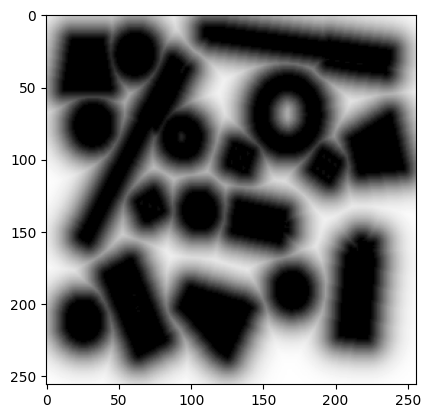

In [12]:
neg = 255 - thres_objects
neg = distance_transform_edt(neg)
neg = exposure.rescale_intensity(neg, out_range=(0,255)).astype(np.uint8)
neg = cv2.equalizeHist(neg)

plt.imshow(neg, cmap='gray', vmin=0, vmax=255)
plt.show()

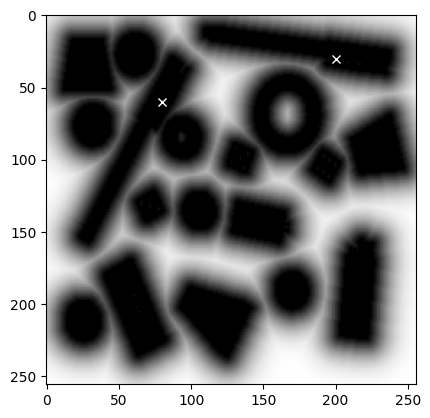

In [21]:
from skimage.segmentation import flood

p1 = (80,60)
p2 = (200,30)

plt.imshow(neg, cmap= 'gray', vmin = 0, vmax= 255)
plt.plot([p1[0]], [p1[1]], marker='x', color='white')
plt.plot([p2[0]], [p2[1]], marker='x', color='white')
plt.show()

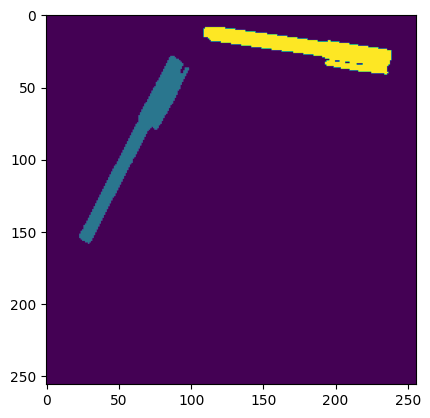

In [ ]:
A = 10
mascara1 = flood(neg, (p1[1], p1[0]), tolerance=A).astype(np.uint8) * 100

mascara2 = flood(neg,  (p2[1], p2[0]), tolerance=A).astype(np.uint8) * 255

mascara_final = mascara1 +  mascara2

plt.imshow(mascara_final)
plt.show()

In [43]:
p1 = None
p2 = None
mini = float('inf')

l1 = []
l2 = []

for i in range(255):
    for j in range(255):
        if mascara_final[i][j] == 100:
            l1.append((i,j))
        elif mascara_final[i][j] == 255:
            l2.append((i,j))

for i in l1:
    for j in l2:
        d = ((i[0] - j[0])**2 +  (i[1] - j[1])**2)**0.5
        if  d < mini:
            mini = d
            p1 = i
            p2 = j

In [55]:
"Distancia minima entre puntos: " + str(mini)

'Distancia minima entre puntos: 24.041630560342615'

In [59]:
p_medio = ((p1[0] + p2[0])//2 , (p1[1] + p2[1])//2 )
p_medio, mascara_final[p_medio]

((23, 100), np.uint8(0))

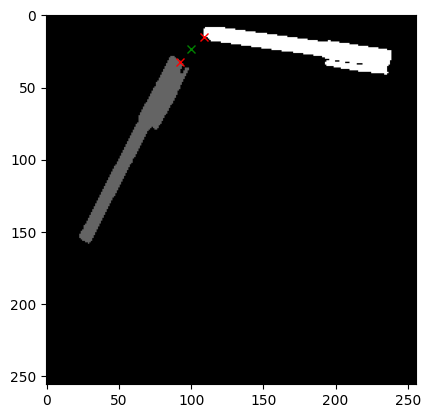

In [60]:
plt.imshow(mascara_final, cmap= 'gray', vmin = 0, vmax= 255)
plt.plot([p1[1]], [p1[0]], marker='x', color='red')
plt.plot([p2[1]], [p2[0]], marker='x', color='red')

plt.plot([p_medio[1]], [p_medio[0]], marker='x', color='green')

plt.show()